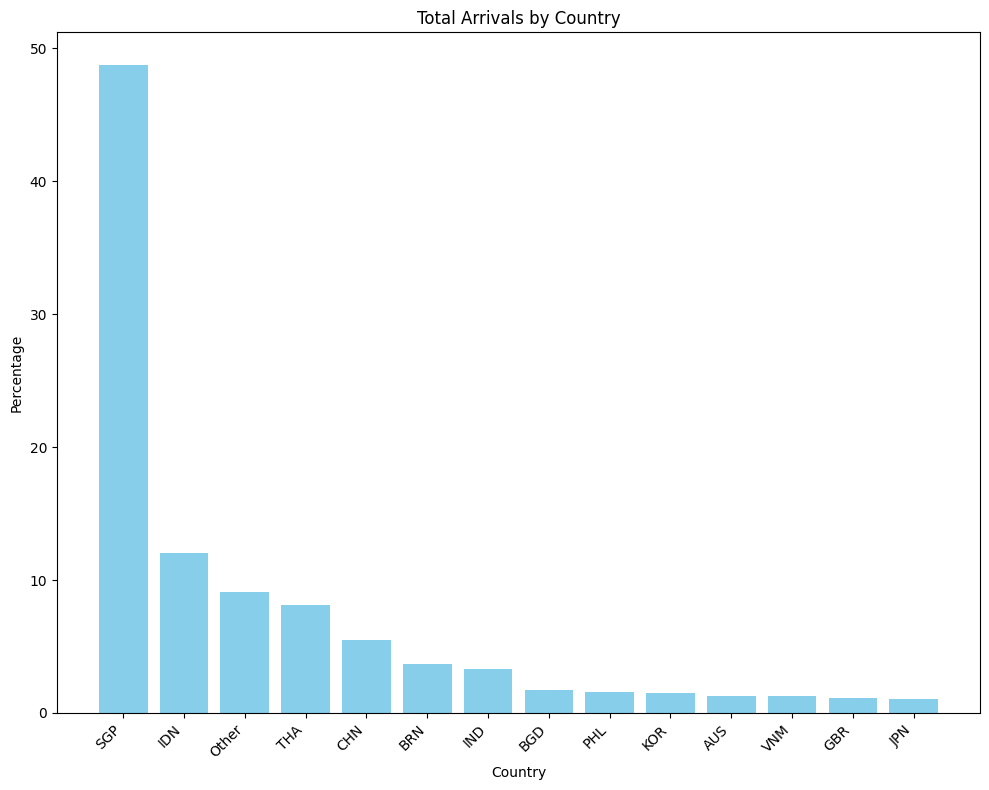

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def load_data(file_path):
    try:
        data = pd.read_csv(file_path)

        return data
    except FileNotFoundError:
        print(f"Error: The file at {file_path} was not found.")
    except pd.errors.EmptyDataError:
        print("Error: The file is empty.")

def clean_data(df):
    try:
        df = df[df['arrivals'] != 0]
        df = df.dropna()
        df = df.drop_duplicates()
        df = df.reset_index(drop=True)

        return df

    except Exception as e:
        print(f"An error occurred during data cleaning: {e}")
        return None

def total_arrivals_by_country(df):
    try:
        grouped_df = df.groupby('country')['arrivals'].sum().reset_index()

        total_arrivals = grouped_df['arrivals'].sum()

        # Calculate percentage of total arrivals for each country
        grouped_df['percentage'] = (grouped_df['arrivals'] / total_arrivals) * 100

        # Separate out countries with less than 1% arrivals
        small_countries = grouped_df[grouped_df['percentage'] < 1]
        large_countries = grouped_df[grouped_df['percentage'] >= 1]

        # Sum the arrivals and percentage for small countries and group them under 'Other'
        if not small_countries.empty:
            other_row = pd.DataFrame({
                'country': ['Other'],
                'arrivals': [small_countries['arrivals'].sum()],
                'percentage': [small_countries['percentage'].sum()]
            })
            grouped_df = pd.concat([large_countries, other_row], ignore_index=True)

        # Sort by percentage in descending order
        grouped_df = grouped_df.sort_values(by='percentage', ascending=False).reset_index(drop=True)

        return grouped_df

    except KeyError:
        print(f"Error: Column not found in DataFrame.")
        return None
    except Exception as e:
        print(f"An error occurred during analysis: {e}")
        return None

def plot_trends(df):
    try:
        plt.figure(figsize=(10, 8))
        plt.bar(df['country'], df['percentage'], color='skyblue')
        plt.title('Total Arrivals by Country')
        plt.xlabel('Country')
        plt.ylabel('Percentage')
        plt.xticks(rotation=45, ha='right')  # Rotate country names for better readability
        plt.tight_layout()
        plt.show()
    except KeyError:
        print(f"Error: 'country' or 'arrivals' column not found in DataFrame.")
    except Exception as e:
        print(f"An error occurred during visualization: {e}")

def main():
    file_path = 'arrivals_soe.csv'
    df = load_data(file_path)

    if df is not None:
        df = clean_data(df)

        if df is not None:
            analyzed_df = total_arrivals_by_country(df)
            analyzed_df.to_csv('total_arrivals.csv', index=False)

            plot_trends(analyzed_df)

if __name__ == "__main__":
    main()